This Notebook is for analyzing temperature data from RCP8.5 projections.

In [2]:
#initiate Model
using Mimi
using CSV
using DataFrames
using Plots

After initiating the packages we will use we need to open and read the data.

In [3]:

dft = CSV.read("updated_projections_temperature_RCP85_sneasybrick.csv", DataFrame)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.0315825,0.0055617,-0.0237161,-0.0271995,-0.186869,-0.262602,-0.00582027,-0.108196,-0.00497589,0.157632,0.0329254,-0.0117298,-0.0780873,-0.158684,0.0965524,-0.33372,0.0131186,-0.183965,-0.123175,0.181937,-0.226657,-0.255351,-0.23516,-0.0723387,0.00138053,-0.020984,0.159412,-0.298994,-0.185455,-0.00364868,-0.260957,-0.150862,-0.0757289,-0.224968,-0.178638,-0.0192044,-0.0178433,0.00716368,0.114131,-0.054573,0.125365,-0.0365097,0.025781,-0.37606,-0.134656,-0.169177,-0.0177943,-0.203273,-0.0214763,0.0443029,-0.0353914,-0.144281,0.158883,-0.175173,-0.0012403,-0.143026,-0.0303204,-0.0770734,-0.00845246,-0.15505,0.0643635,-0.0857155,0.0712519,-0.0385653,0.04495,-0.0963797,0.149852,0.236969,-0.0394935,0.108053,0.00438546,0.268021,-0.169802,-0.217696,-0.0334035,-0.0432714,-0.0518406,0.0396081,-0.0301235,-0.232362,0.131617,-0.146289,0.0584418,0.0144428,0.00472612,-0.191595,-0.0229382,-0.0502981,0.0381103,0.0137722,0.0951725,-0.119384,-0.0589347,-0.255106,-0.00975045,-0.0512635,-0.120994,0.0380591,0.0703251,⋯
2,1851,0.0542699,-0.141403,0.000958853,-0.111827,-0.133155,-0.0388204,-0.230095,-0.0351384,0.0200956,0.0479486,-0.06667,0.180547,-0.142886,-0.115237,-0.144817,-0.0434511,-0.0865206,0.103128,-0.0412958,-0.172783,0.00174384,-0.103631,-0.156265,-0.180665,-0.137266,0.110538,-0.0838044,-0.152377,0.0188842,0.00912538,0.0490107,0.245256,0.0769207,0.0191031,-0.128508,0.0252513,0.0987948,-0.0441999,0.183156,0.0299245,0.177754,0.1572,0.0968056,0.0116079,-0.089561,0.184951,-0.106348,-0.0680507,0.0620432,0.0932063,0.176312,0.124057,0.075956,0.0863115,-0.0720135,-0.16907,-0.0052618,-0.19235,-0.00210637,0.180595,0.0186096,-0.00475638,-0.018084,-0.133507,0.0923664,0.191984,-0.0711732,0.0705638,-0.267502,-0.256421,0.0443645,0.0582318,0.224932,-0.404083,-0.0861219,0.101724,0.161876,-0.0884815,-0.00641206,-0.16278,-0.102208,0.0288759,0.326483,0.0792877,0.13421,-0.0930158,0.11344,0.0218009,0.0523426,0.109139,0.0837071,0.075803,0.158266,-0.138761,0.218152,0.384112,-0.0542485,-0.0158553,0.23462,⋯
3,1852,0.010358,-0.109326,0.0403634,0.049863,0.114645,-0.100423,-0.0399549,-0.160802,0.0433712,0.0209195,-0.0751727,-0.169811,-0.0123062,-0.0178168,0.160433,-0.259128,0.302603,0.142245,0.0473617,-0.0246202,-0.0166267,-0.0899817,-0.00364028,0.100045,-0.16031,0.0281432,0.0888022,0.0317305,0.263121,-0.073367,-0.000590004,0.0494175,0.164877,-0.208642,0.040659,-0.0420332,0.055178,-0.0218358,0.119182,-0.0431615,0.131381,-0.133366,0.028709,-0.191209,-0.0029919,-0.00651213,-0.255772,-0.13079,-0.189336,0.207531,-0.240183,0.0692146,0.0261819,-0.0896661,0.122287,0.214478,-0.0906552,-0.0496562,0.253651,0.222455,-0.0166875,0.106031,0.0306571,-0.0315721,0.00292837,-0.177049,-0.146752,-0.0121592,0.0334891,-0.273455,-0.128669,0.0814376,-0.103244,-0.0637299,0.0781922,0.058477,0.120943,0.19026,

First we set our index variables.

In [4]:
colr = collect(2:ncol(dft))
rowr = collect(1:nrow(dft))

451-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   ⋮
 443
 444
 445
 446
 447
 448
 449
 450
 451

Then we solve for when find the rows within the timeframe of the years selected.

In [5]:
#create array list to house all years within the norm period
normp = []
#set normalization period
for r in rowr
    if 1850 <= dft[r,:year] <= 1900
        push!(normp, r)
    end
end 

Next, we index through each temperature of the n ormalization period for each trial and collect their value.

In [6]:
# Set the index and array to solve for normalized value
sarray = []
i = 0

# Add each value to a sum
for r in normp
    for c in colr
        push!(sarray, dft[r, c])
        i += 1
    end
end
sarray[1]

-0.031582453

Next we find the mean.

In [7]:
# Collect the sum
summ = 0
for t in collect(1:i)
    summ += sarray[t]
end
# Divide by the number of terms(i)
avg = summ / i


-0.03030344187909853

Next we noramlize the data for each instance.

In [8]:
# change the value for each instance after the first 50 years
for r in rowr
    for c in colr
        dft[r, c] = (dft[r, c] - avg)
    end
end
dft

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.00127901,0.0358651,0.00658736,0.00310391,-0.156565,-0.232298,0.0244832,-0.0778929,0.0253276,0.187936,0.0632288,0.0185737,-0.0477839,-0.12838,0.126856,-0.303417,0.043422,-0.153661,-0.0928713,0.212241,-0.196354,-0.225047,-0.204856,-0.0420353,0.031684,0.00931942,0.189716,-0.268691,-0.155151,0.0266548,-0.230653,-0.120558,-0.0454255,-0.194665,-0.148334,0.011099,0.0124601,0.0374671,0.144434,-0.0242696,0.155668,-0.00620622,0.0560844,-0.345756,-0.104353,-0.138873,0.0125091,-0.172969,0.00882713,0.0746064,-0.00508793,-0.113978,0.189187,-0.144869,0.0290631,-0.112723,-1.69641e-5,-0.0467699,0.021851,-0.124746,0.0946669,-0.0554121,0.101555,-0.00826186,0.0752535,-0.0660762,0.180156,0.267272,-0.00919001,0.138356,0.0346889,0.298325,-0.139498,-0.187392,-0.00310008,-0.012968,-0.0215372,0.0699116,0.000179953,-0.202058,0.16192,-0.115986,0.0887452,0.0447463,0.0350296,-0.161291,0.00736523,-0.0199946,0.0684137,0.0440757,0.125476,-0.0890807,-0.0286312,-0.224802,0.020553,-0.0209601,-0.0906909,0.0683625,0.100629,⋯
2,1851,0.0845733,-0.111099,0.0312623,-0.0815236,-0.102852,-0.00851698,-0.199791,-0.00483495,0.0503991,0.0782521,-0.0363666,0.210851,-0.112583,-0.0849339,-0.114513,-0.0131476,-0.0562172,0.133431,-0.0109924,-0.142479,0.0320473,-0.0733278,-0.125961,-0.150361,-0.106962,0.140841,-0.053501,-0.122074,0.0491877,0.0394288,0.0793141,0.27556,0.107224,0.0494065,-0.0982043,0.0555547,0.129098,-0.0138965,0.213459,0.060228,0.208057,0.187504,0.127109,0.0419113,-0.0592576,0.215255,-0.0760446,-0.0377472,0.0923466,0.12351,0.206616,0.154361,0.106259,0.116615,-0.0417101,-0.138767,0.0250416,-0.162047,0.0281971,0.210899,0.0489131,0.0255471,0.0122194,-0.103204,0.12267,0.222288,-0.0408698,0.100867,-0.237198,-0.226117,0.074668,0.0885353,0.255235,-0.373779,-0.0558185,0.132027,0.192179,-0.058178,0.0238914,-0.132477,-0.0719044,0.0591793,0.356787,0.109591,0.164513,-0.0627123,0.143743,0.0521044,0.0826461,0.139443,0.114011,0.106106,0.18857,-0.108458,0.248456,0.414415,-0.0239451,0.0144482,0.264923,⋯
3,1852,0.0406614,-0.0790225,0.0706668,0.0801665,0.144949,-0.0701197,-0.00965145,-0.130498,0.0736746,0.0512229,-0.0448693,-0.139508,0.0179973,0.0124866,0.190737,-0.228825,0.332906,0.172548,0.0776651,0.00568321,0.0136767,-0.0596782,0.0266632,0.130348,-0.130006,0.0584467,0.119106,0.0620339,0.293425,-0.0430635,0.0297134,0.0797209,0.195181,-0.178338,0.0709624,-0.0117298,0.0854815,0.00846759,0.149486,-0.0128581,0.161684,-0.103063,0.0590124,-0.160905,0.0273115,0.0237913,-0.225469,-0.100487,-0.159032,0.237835,-0.209879,0.099518,0.0564854,-0.0593627,0.15259,0.244781,-0.0603517,-0.0193528,0.283954,0.252759,0.0136159,0.136335,0.0609605,-0.00126869,0.0332318,-0.146745,-0.116449,0.0181442,0.0637925,-0.243152,-0.0983651,0.111741,-0.0729404,-0.0334264,0.108496,0.0887805,0.151247,0.220564,-0.0283644,-0.179567,0.

Now to prep for graphing we create a empty dict to hold all the results each year.

In [9]:
yearVals = Dict{Any, Any}()
print("Dict values = ", yearVals)

Dict values = Dict{Any, Any}()

Next we determine the year 2100 in the df.

In [10]:
#Set year we are looking for and initiate row
yr = 2100
rw = 0
#claculate what row we are looking for
for r in rowr
    if dft[r,:year] == yr
        rw = r
    end
end
rw

251

Now we store all the values from that row into the yearVals Dict

In [11]:
x2100 = []
for c in colr
    push!(x2100, dft[rw, c])
end
x2100

10000-element Vector{Any}:
 4.940058832879099
 3.2554046718790985
 4.472642827879098
 5.492420418879099
 4.192914710879099
 4.1722702778790985
 3.8777005718790987
 3.7875448228790987
 4.631302627879099
 3.8473599688790987
 ⋮
 4.2813712248790985
 3.9148311238790985
 4.829255460879098
 4.228298333879098
 3.7357581708790986
 4.682069538879099
 4.410863731879099
 4.9634468988790985
 5.348214252879099

Make the histogram.

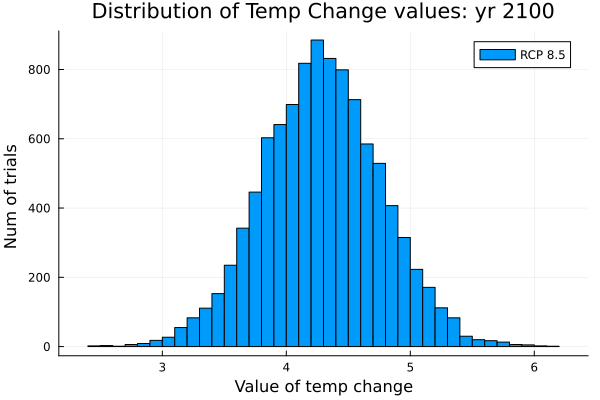

In [12]:

histogram(x2100, label = "RCP 8.5")
title!("Distribution of Temp Change values: yr 2100")
xlabel!("Value of temp change")
ylabel!("Num of trials ")
     